In [52]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
# Load the preprocessed dataset
df = pd.read_csv("stroke_data_preprocessed.csv")

# Basic information about the dataset
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.2+ KB
None


In [62]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
                 id          age  hypertension  heart_disease  ever_married  \
count   5110.000000  5110.000000   5110.000000    5110.000000   5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012      0.656164   
std    21161.721625    22.612647      0.296607       0.226063      0.475034   
min       67.000000     0.080000      0.000000       0.000000      0.000000   
25%    17741.250000    25.000000      0.000000       0.000000      0.000000   
50%    36932.000000    45.000000      0.000000       0.000000      1.000000   
75%    54682.000000    61.000000      0.000000       0.000000      1.000000   
max    72940.000000    82.000000      1.000000       1.000000      1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.862035     0.048728  
std            45.283560     7.699562     0.215320  
min            55.120000    10.300000     0.000000  
25

In [64]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())





Missing Values in Each Column:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


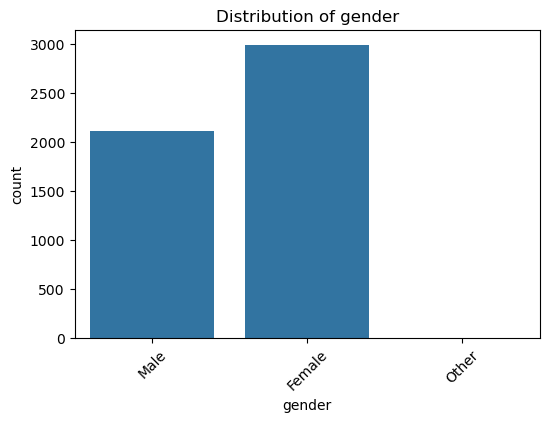

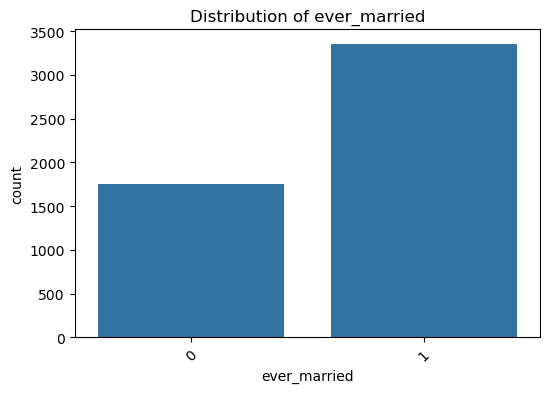

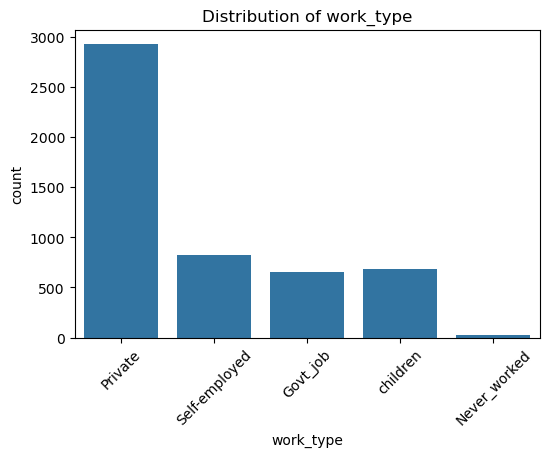

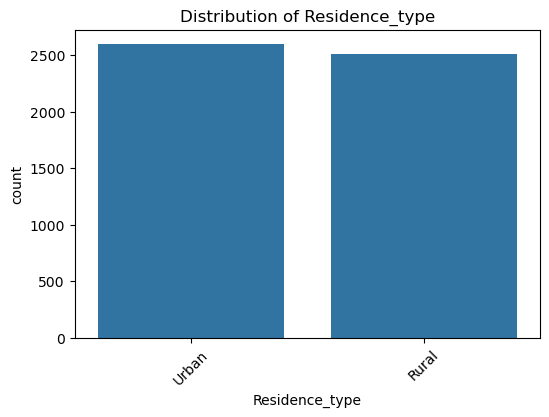

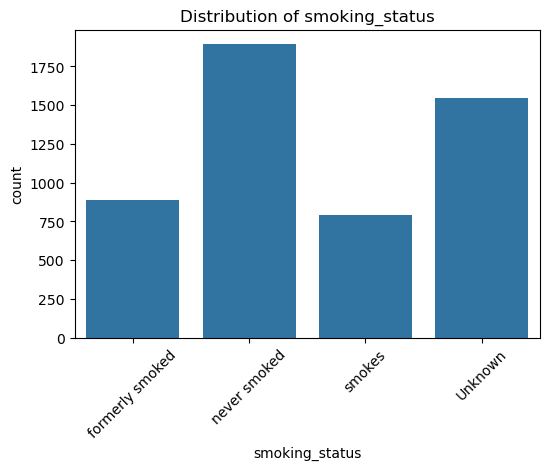

In [66]:
# Countplot for categorical features
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


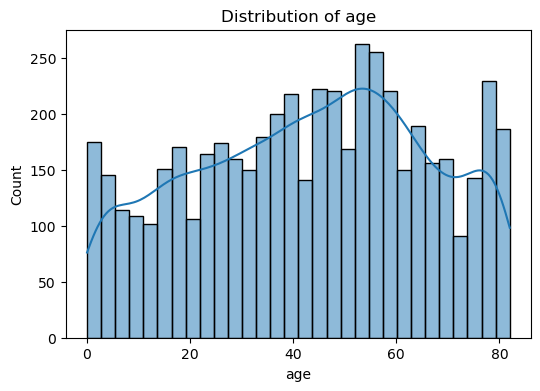

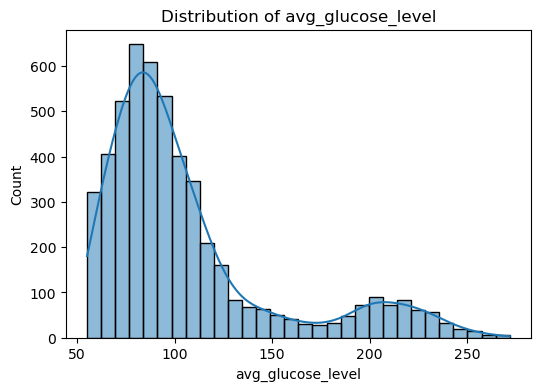

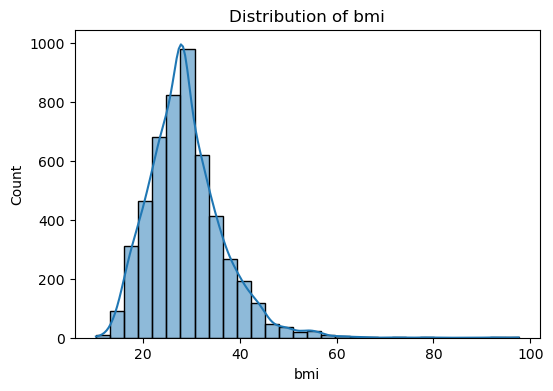

In [68]:
# Histogram for numerical features
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

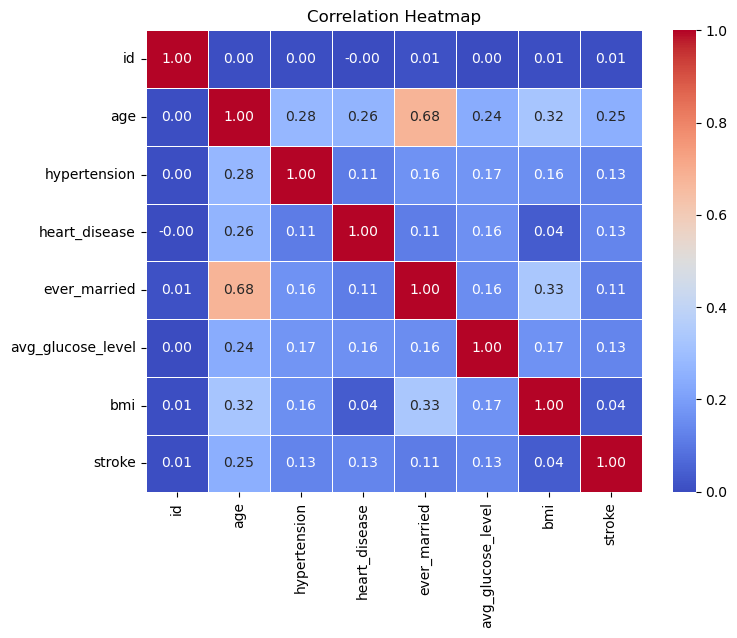

In [72]:
# Check correlation between numerical variables
plt.figure(figsize=(8, 6))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


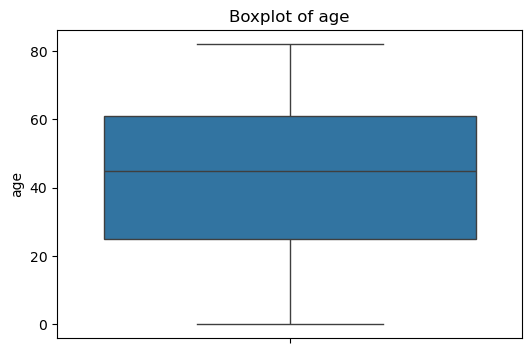

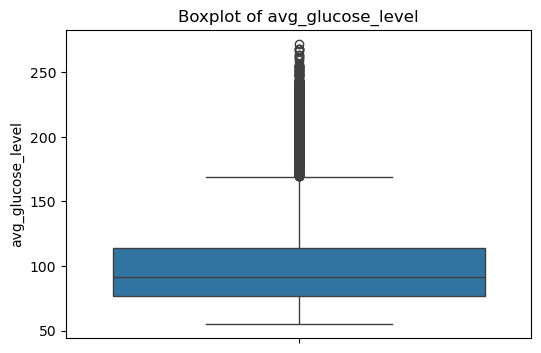

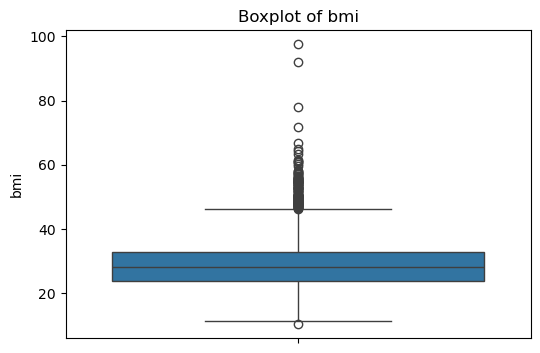

In [74]:

# Boxplots for detecting outliers in numerical variables
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

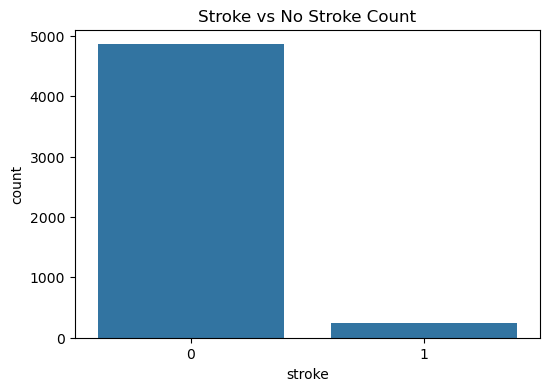

In [76]:
# Stroke distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['stroke'])
plt.title("Stroke vs No Stroke Count")
plt.show()

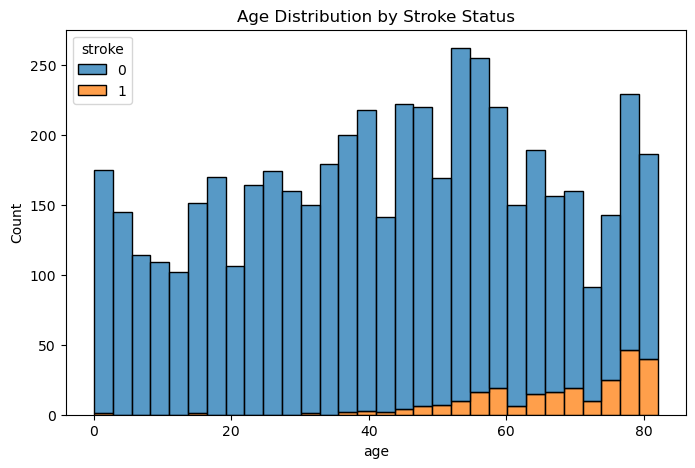

In [78]:
# Age distribution by stroke status
plt.figure(figsize=(8, 5))
sns.histplot(df, x="age", hue="stroke", multiple="stack", bins=30)
plt.title("Age Distribution by Stroke Status")
plt.show()

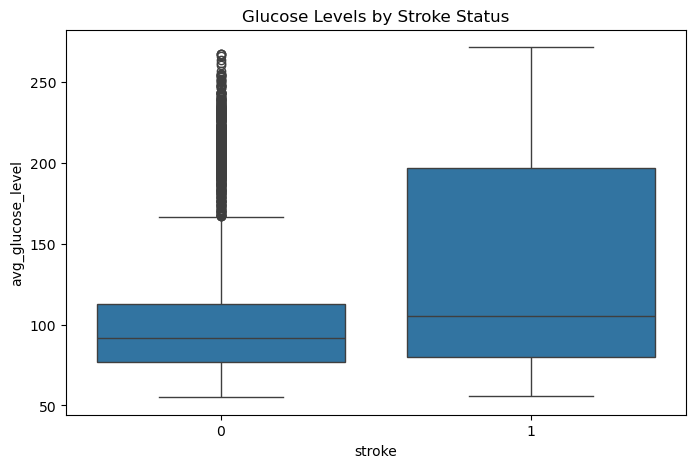

In [80]:
# Glucose levels by stroke status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["stroke"], y=df["avg_glucose_level"])
plt.title("Glucose Levels by Stroke Status")
plt.show()

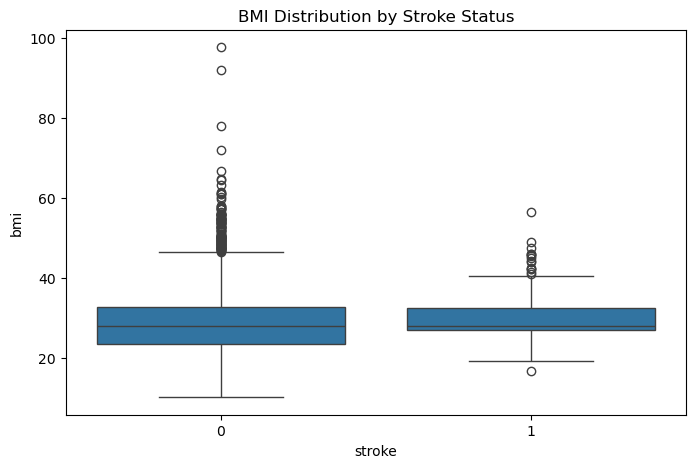

In [82]:
# BMI distribution by stroke status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["stroke"], y=df["bmi"])
plt.title("BMI Distribution by Stroke Status")
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Load the preprocessed dataset
df = pd.read_csv("stroke_data_preprocessed.csv")





In [92]:
# Feature Engineering
# 1. Creating Age Groups
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 30, 40, 50, 60, 70, 80, np.inf], 
                         labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+'],
                         right=False)

In [94]:

# 2. Creating BMI Categories
df['bmi_category'] = pd.cut(df['bmi'], 
                            bins=[0, 18.5, 24.9, 29.9, 39.9, np.inf], 
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese'],
                            right=False)

In [96]:

# 3. Creating Glucose Levels Categories
df['glucose_category'] = pd.cut(df['avg_glucose_level'], 
                                 bins=[0, 70, 100, 125, 140, np.inf], 
                                 labels=['Low', 'Normal', 'Prediabetes', 'Diabetes', 'High'],
                                 right=False)

In [98]:
# 4. Encoding Categorical Variables
df = pd.get_dummies(df, columns=['gender', 'work_type', 'Residence_type', 'smoking_status', 'age_group', 'bmi_category', 'glucose_category'], drop_first=True)

In [100]:
# 5. Interaction Features
# Example: Interaction between hypertension and heart_disease
df['hypertension_heart_disease'] = df['hypertension'] * df['heart_disease']

In [102]:
# 6. Ratio Features
# Example: BMI to Glucose Ratio
df['bmi_glucose_ratio'] = df['bmi'] / (df['avg_glucose_level'] + 1e-9)  # Add a small constant to avoid division by zero

In [104]:
# 7. Temporal Features (if available)
# Example: If you have a 'date' column, you can extract features like year, month, day of the week, etc.
# Assuming there's a 'date' column
# df['date'] = pd.to_datetime(df['date'])
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month
# df['day_of_week'] = df['date'].dt.dayofweek

In [106]:

# 8. Normalize/Standardize numerical features if required
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['age', 'avg_glucose_level', 'bmi', 'bmi_glucose_ratio']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [108]:
# Save the modified DataFrame to a new CSV
df.to_csv("stroke_data_engineered.csv", index=False)

print("Feature engineering complete. The new dataset has been saved as 'stroke_data_engineered.csv'.")

Feature engineering complete. The new dataset has been saved as 'stroke_data_engineered.csv'.


In [ ]:
#using the new dataset for data visualization

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the engineered dataset
df = pd.read_csv("stroke_data_engineered.csv")


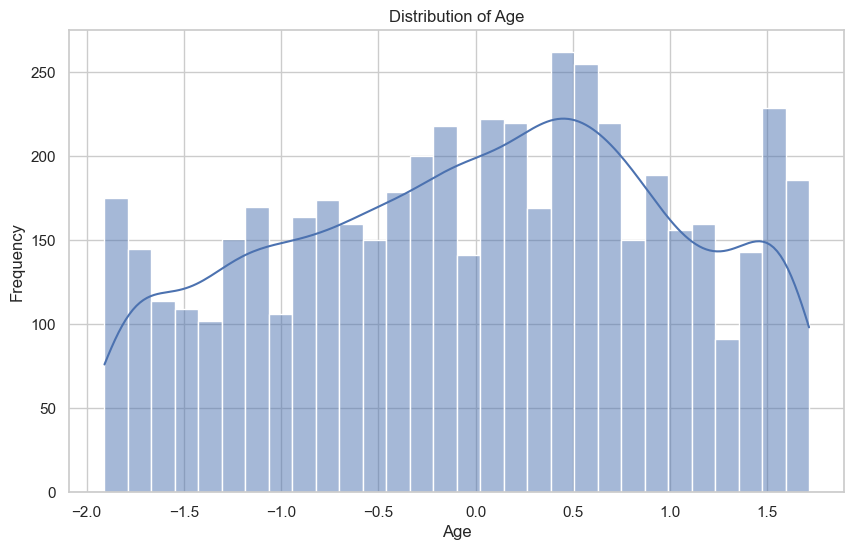

In [112]:
# Set the visual style
sns.set(style="whitegrid")

# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


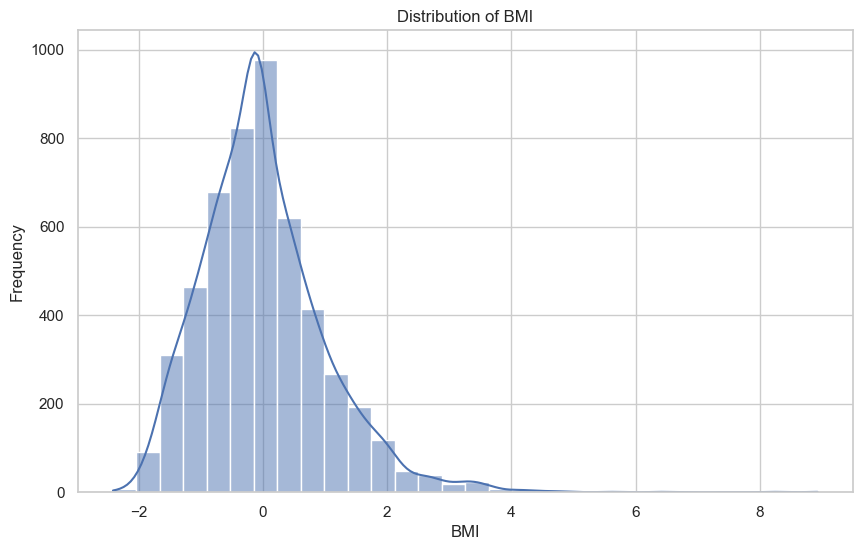

In [114]:
# 2. Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


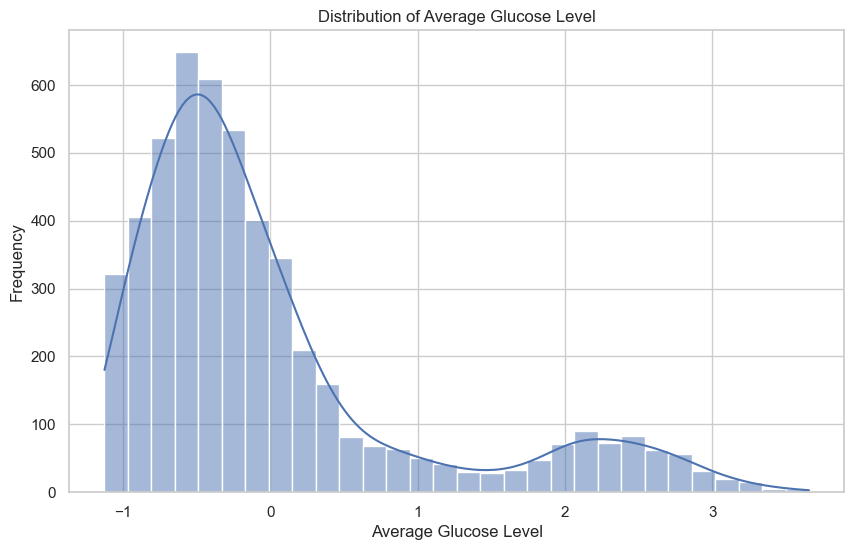

In [116]:
# 3. Distribution of Average Glucose Level
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_glucose_level'], bins=30, kde=True)
plt.title("Distribution of Average Glucose Level")
plt.xlabel("Average Glucose Level")
plt.ylabel("Frequency")
plt.show()


Columns in the DataFrame:
Index(['id', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'gender_Male', 'gender_Other',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'age_group_31-40', 'age_group_41-50',
       'age_group_51-60', 'age_group_61-70', 'age_group_71-80',
       'age_group_81+', 'bmi_category_Normal', 'bmi_category_Overweight',
       'bmi_category_Obese', 'bmi_category_Severely Obese',
       'glucose_category_Normal', 'glucose_category_Prediabetes',
       'glucose_category_Diabetes', 'glucose_category_High',
       'hypertension_heart_disease', 'bmi_glucose_ratio'],
      dtype='object')


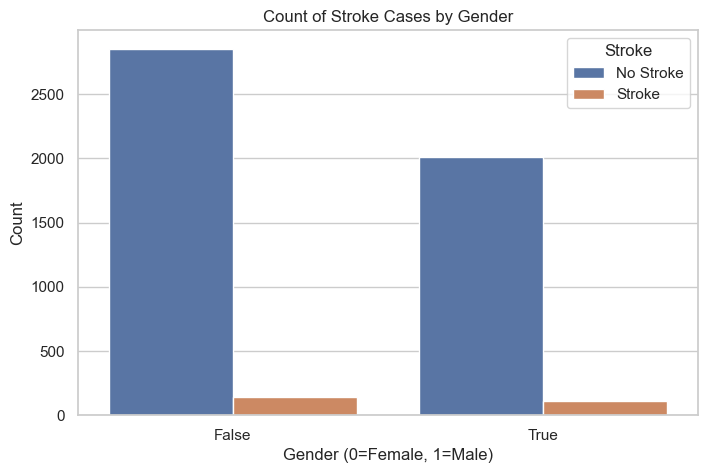

In [120]:
# Check the columns to find the gender-related columns
print("Columns in the DataFrame:")
print(df.columns)

# Determine gender column names (assuming one-hot encoding)
gender_column = [col for col in df.columns if 'gender' in col]

# 4. Count of Stroke Cases by Gender
plt.figure(figsize=(8, 5))
if gender_column:  # Check if gender columns exist
    sns.countplot(x=gender_column[0], data=df, hue='stroke')  # Use the first gender column found
    plt.title("Count of Stroke Cases by Gender")
    plt.xlabel("Gender (0=Female, 1=Male)")
    plt.ylabel("Count")
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
    plt.show()
else:
    print("No gender column found in the DataFrame.")


In [124]:

# 5. Count of Stroke Cases by Age Group
plt.figure(figsize=(10, 6))
if 'age_group' in df.columns and 'stroke' in df.columns:  # Check if columns exist
    sns.countplot(x='age_group', data=df, hue='stroke')
    plt.title("Count of Stroke Cases by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Count")
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
    plt.show()
else:
    print("Columns 'age_group' or 'stroke' not found in the DataFrame.")



Columns 'age_group' or 'stroke' not found in the DataFrame.


<Figure size 1000x600 with 0 Axes>

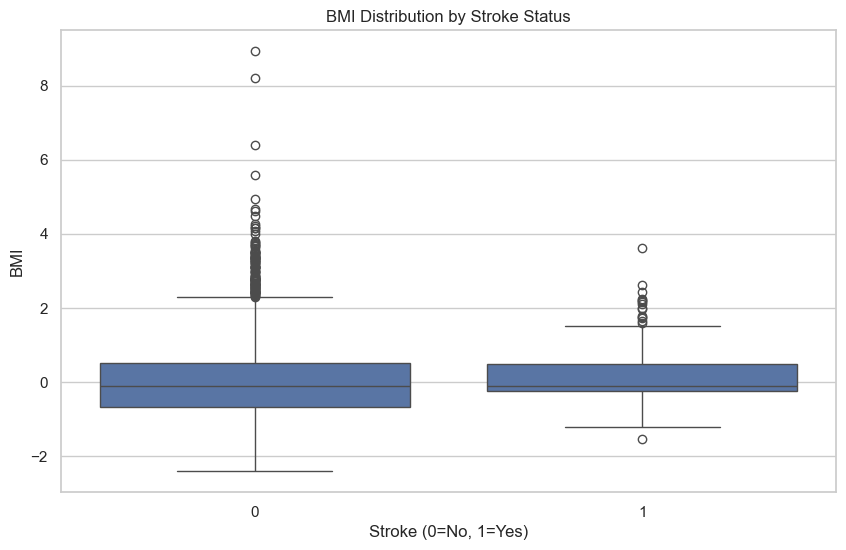

In [126]:
# 6. Boxplot of BMI by Stroke Status
plt.figure(figsize=(10, 6))
if 'stroke' in df.columns and 'bmi' in df.columns:  # Check if columns exist
    sns.boxplot(x='stroke', y='bmi', data=df)
    plt.title("BMI Distribution by Stroke Status")
    plt.xlabel("Stroke (0=No, 1=Yes)")
    plt.ylabel("BMI")
    plt.show()
else:
    print("Columns 'stroke' or 'bmi' not found in the DataFrame.")

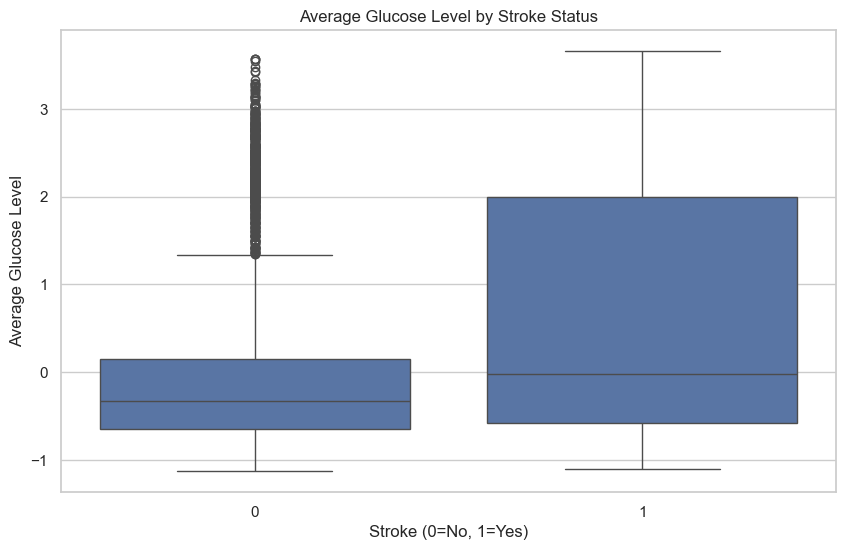

In [128]:

# 7. Boxplot of Average Glucose Level by Stroke Status
plt.figure(figsize=(10, 6))
if 'stroke' in df.columns and 'avg_glucose_level' in df.columns:  # Check if columns exist
    sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
    plt.title("Average Glucose Level by Stroke Status")
    plt.xlabel("Stroke (0=No, 1=Yes)")
    plt.ylabel("Average Glucose Level")
    plt.show()
else:
    print("Columns 'stroke' or 'avg_glucose_level' not found in the DataFrame.")

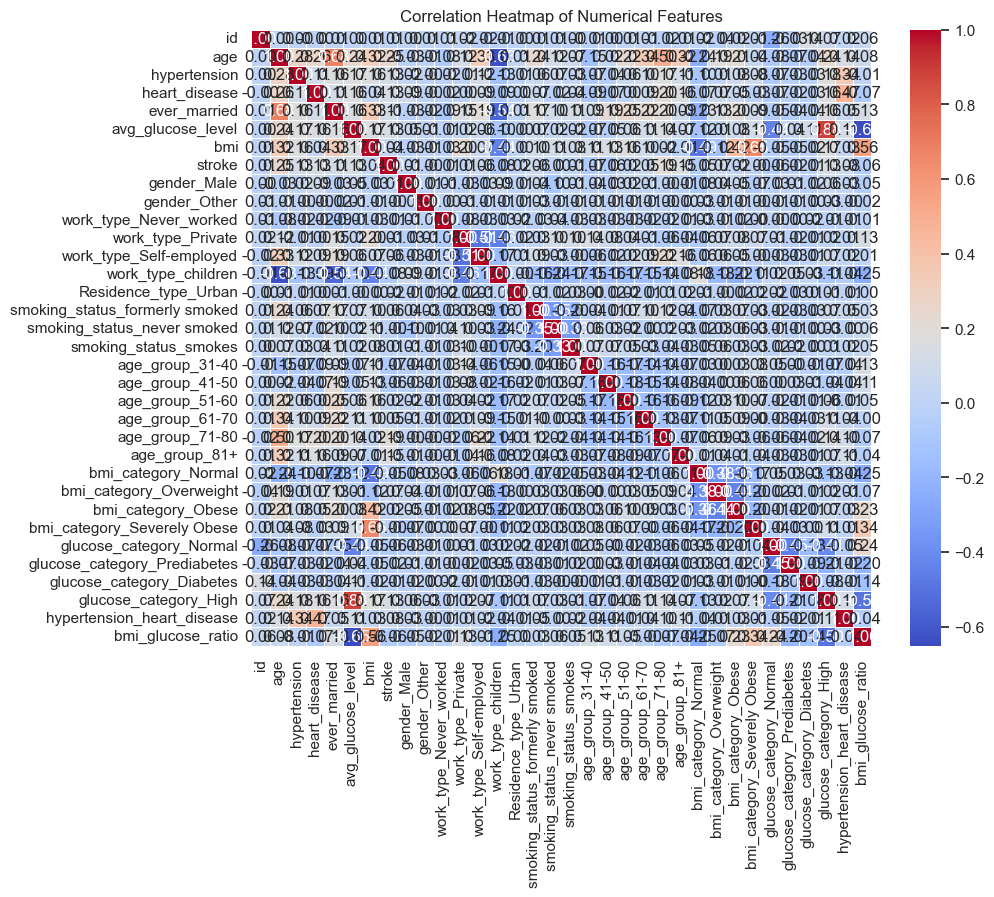

In [130]:

# 8. Heatmap of Correlation Between Numerical Features
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

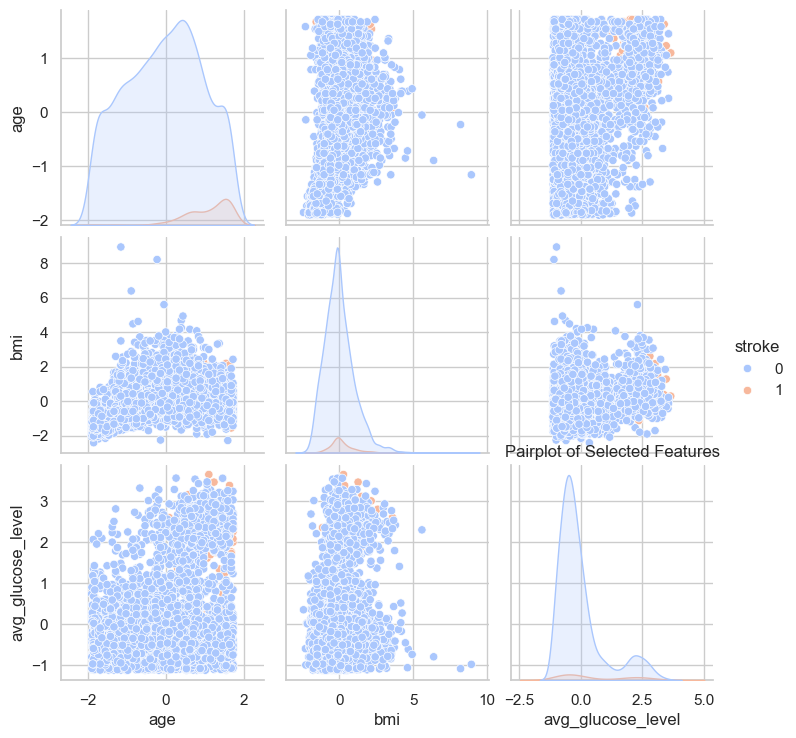

In [132]:

# 9. Pairplot for Selected Features
selected_features = ['age', 'bmi', 'avg_glucose_level', 'stroke']
# Check if all selected features exist in the DataFrame
if all(feature in df.columns for feature in selected_features):
    sns.pairplot(df[selected_features], hue='stroke', palette='coolwarm', diag_kind='kde')
    plt.title("Pairplot of Selected Features")
    plt.show()
else:
    print("One or more selected features are not found in the DataFrame.")


In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
# Load the engineered dataset
df = pd.read_csv("stroke_data_engineered.csv")


In [141]:
# Feature and target separation
X = df.drop(columns=['stroke'])  # Features
y = df['stroke']  # Target variable

In [143]:
# 1. Feature Selection
# Using SelectKBest to select the top K features
k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]  # Get the names of the selected features
print(f"Selected Features: {selected_features.tolist()}")

Selected Features: ['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'work_type_children', 'age_group_71-80', 'age_group_81+', 'glucose_category_High', 'hypertension_heart_disease']


In [145]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [147]:
# 3. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
# 4. Model Selection and Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [151]:
# 5. Model Evaluation
y_pred = model.predict(X_test)

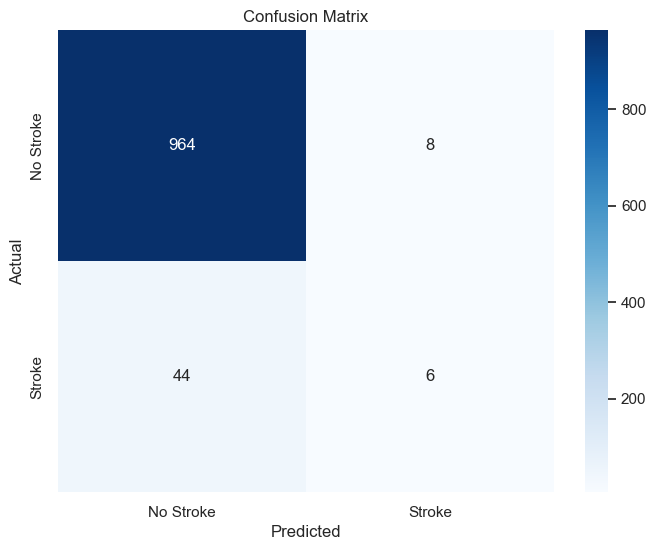

In [153]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [155]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       972
           1       0.43      0.12      0.19        50

    accuracy                           0.95      1022
   macro avg       0.69      0.56      0.58      1022
weighted avg       0.93      0.95      0.94      1022



In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the engineered dataset
df = pd.read_csv("stroke_data_engineered.csv")

# Feature and target separation
X = df.drop(columns=['stroke'])  # Features
y = df['stroke']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models to evaluate
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Classifier': SVC(probability=True, random_state=42)
}

# Initialize a dictionary to store evaluation results
results = {}



In [163]:
print(y.value_counts())


stroke
0    4861
1     249
Name: count, dtype: int64


In [165]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')


In [167]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [171]:
# Define models to evaluate with class weights
models = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Support Vector Classifier': SVC(probability=True, random_state=42, class_weight='balanced')
}


In [174]:
# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  # Get detailed metrics
    precision = report['1']['precision']  # Precision for the positive class
    recall = report['1']['recall']  # Recall for the positive class
    f1 = report['1']['f1-score']  # F1-score for the positive class




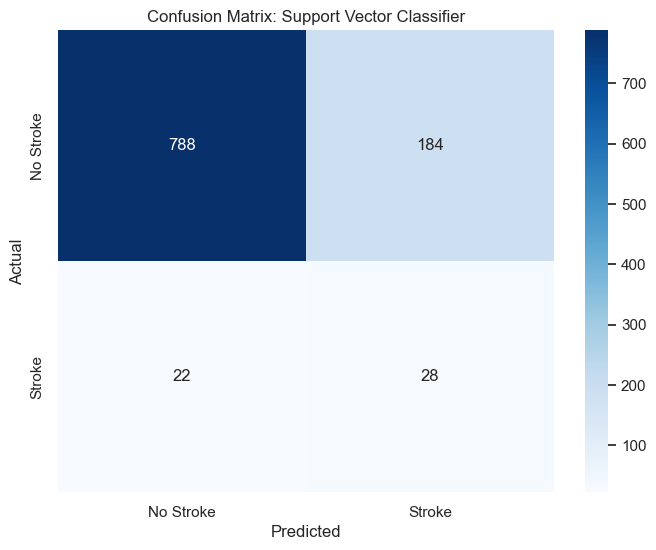

Model Evaluation Results:
                           Accuracy  Precision  Recall  F1 Score
Random Forest              0.951076   0.000000    0.00   0.00000
Gradient Boosting          0.947162   0.000000    0.00   0.00000
Logistic Regression        0.951076   0.000000    0.00   0.00000
Support Vector Classifier  0.798434   0.132075    0.56   0.21374


In [176]:
    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)